In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing all data

In [2]:
airports = pd.read_csv("airports.dat", names=["airport_id", "name", "city", "country", "iata", "icao", "latitude", "longitude", "altitude", "timezone", "dst", "tz_database_timezone", "type", "source"])
airports.head()

,airport_id,name,city,country,iata,icao,latitude,longitude,altitude,timezone,dst,tz_database_timezone,type,source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


In [3]:
airlines = pd.read_csv("airlines.dat", names=["airline_id", "name", "alias", "iata", "icao", "callsign", "country", "active"])
airlines.head()

,airline_id,name,alias,iata,icao,callsign,country,active
0,-1,Unknown,\N,-,NaN,\N,\N,Y
1,1,Private flight,\N,-,NaN,NaN,NaN,Y
2,2,135 Airways,\N,NaN,GNL,GENERAL,United States,N
3,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y
4,4,2 Sqn No 1 Elementary Flying Training School,\N,NaN,WYT,NaN,United Kingdom,N


In [4]:
routes = pd.read_csv("routes.dat", names=["airline", "airline_id", "source_airport", "source_airport_id", "destination_airport", "destination_airport_id", "codeshare", "stops", "equipment"])
routes.head()

,airline,airline_id,source_airport,source_airport_id,destination_airport,destination_airport_id,codeshare,stops,equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2


In [5]:
planes = pd.read_csv("planes.dat", names=["name", "iata", "icao"])
planes.head()

,name,iata,icao
0,Aerospatiale (Nord) 262,ND2,N262
1,Aerospatiale (Sud Aviation) Se.210 Caravelle,CRV,S210
2,Aerospatiale SN.601 Corvette,NDC,S601
3,Aerospatiale/Alenia ATR 42-300,AT4,AT43
4,Aerospatiale/Alenia ATR 42-500,AT5,AT45


# Merging airlines and routes

In [6]:
# fix typing for merge
routes['airline_id'] = routes['airline_id'].replace('\\N', pd.NA)
routes['airline_id'] = pd.to_numeric(routes['airline_id'])

In [7]:
# only keep direct routes
direct_routes = routes[routes.stops == 0]

In [8]:
# merge airlines and routes
flights = direct_routes.merge(airlines, how='inner', on='airline_id')
flights.head()

,airline,airline_id,source_airport,source_airport_id,destination_airport,destination_airport_id,codeshare,stops,equipment,name,alias,iata,icao,callsign,country,active
0,2B,410.0,AER,2965,KZN,2990,NaN,0,CR2,Aerocondor,\N,2B,ARD,AEROCONDOR,Portugal,Y
1,2B,410.0,ASF,2966,KZN,2990,NaN,0,CR2,Aerocondor,\N,2B,ARD,AEROCONDOR,Portugal,Y
2,2B,410.0,ASF,2966,MRV,2962,NaN,0,CR2,Aerocondor,\N,2B,ARD,AEROCONDOR,Portugal,Y
3,2B,410.0,CEK,2968,KZN,2990,NaN,0,CR2,Aerocondor,\N,2B,ARD,AEROCONDOR,Portugal,Y
4,2B,410.0,CEK,2968,OVB,4078,NaN,0,CR2,Aerocondor,\N,2B,ARD,AEROCONDOR,Portugal,Y


In [9]:
# only keep routes of active airlines
flights = flights[flights.active == 'Y']

In [10]:
# drop unnecessary columns
flights.drop(labels=['airline_id', 'alias', 'iata', 'icao', 'callsign', 'stops', 'active'], axis=1, inplace=True)
flights.head()

,airline,source_airport,source_airport_id,destination_airport,destination_airport_id,codeshare,equipment,name,country
0,2B,AER,2965,KZN,2990,NaN,CR2,Aerocondor,Portugal
1,2B,ASF,2966,KZN,2990,NaN,CR2,Aerocondor,Portugal
2,2B,ASF,2966,MRV,2962,NaN,CR2,Aerocondor,Portugal
3,2B,CEK,2968,KZN,2990,NaN,CR2,Aerocondor,Portugal
4,2B,CEK,2968,OVB,4078,NaN,CR2,Aerocondor,Portugal


In [11]:
# rename columns
flights.rename(columns={'airline': 'airline_code', 'name': 'airline', 'country': 'airline_country'}, inplace=True)
flights.head()

,airline_code,source_airport,source_airport_id,destination_airport,destination_airport_id,codeshare,equipment,airline,airline_country
0,2B,AER,2965,KZN,2990,NaN,CR2,Aerocondor,Portugal
1,2B,ASF,2966,KZN,2990,NaN,CR2,Aerocondor,Portugal
2,2B,ASF,2966,MRV,2962,NaN,CR2,Aerocondor,Portugal
3,2B,CEK,2968,KZN,2990,NaN,CR2,Aerocondor,Portugal
4,2B,CEK,2968,OVB,4078,NaN,CR2,Aerocondor,Portugal


# Merging airports

In [12]:
# fix typing for merge
flights['source_airport_id'] = flights['source_airport_id'].replace('\\N', pd.NA)
flights['source_airport_id'] = pd.to_numeric(flights['source_airport_id'])
flights['destination_airport_id'] = flights['destination_airport_id'].replace('\\N', pd.NA)
flights['destination_airport_id'] = pd.to_numeric(flights['destination_airport_id'])

In [13]:
# merge with source airports
flights = flights.merge(airports, left_on='source_airport_id', right_on='airport_id')
flights.head()

,airline_code,source_airport,source_airport_id,destination_airport,destination_airport_id,codeshare,equipment,airline,airline_country,airport_id,...,iata,icao,latitude,longitude,altitude,timezone,dst,tz_database_timezone,type,source
0,2B,AER,2965.0,KZN,2990.0,NaN,CR2,Aerocondor,Portugal,2965,...,AER,URSS,43.449902,39.956600,89,3,N,Europe/Moscow,airport,OurAirports
1,2B,ASF,2966.0,KZN,2990.0,NaN,CR2,Aerocondor,Portugal,2966,...,ASF,URWA,46.283298,48.006302,-65,4,N,Europe/Samara,airport,OurAirports
2,2B,ASF,2966.0,MRV,2962.0,NaN,CR2,Aerocondor,Portugal,2966,...,ASF,URWA,46.283298,48.006302,-65,4,N,Europe/Samara,airport,OurAirports
3,2B,CEK,2968.0,KZN,2990.0,NaN,CR2,Aerocondor,Portugal,2968,...,CEK,USCC,55.305801,61.503300,769,5,N,Asia/Yekaterinburg,airport,OurAirports
4,2B,CEK,2968.0,OVB,4078.0,NaN,CR2,Aerocondor,Portugal,2968,...,CEK,USCC,55.305801,61.503300,769,5,N,Asia/Yekaterinburg,airport,OurAirports


In [14]:
# drop unnecessary columns
flights.drop(labels=['source_airport_id', 'airport_id', 'city', 'iata', 'icao', 'latitude', 'longitude', 'altitude', 'timezone', 'dst', 'tz_database_timezone', 'type', 'source'], axis=1, inplace=True)
flights.head()

,airline_code,source_airport,destination_airport,destination_airport_id,codeshare,equipment,airline,airline_country,name,country
0,2B,AER,KZN,2990.0,NaN,CR2,Aerocondor,Portugal,Sochi International Airport,Russia
1,2B,ASF,KZN,2990.0,NaN,CR2,Aerocondor,Portugal,Astrakhan Airport,Russia
2,2B,ASF,MRV,2962.0,NaN,CR2,Aerocondor,Portugal,Astrakhan Airport,Russia
3,2B,CEK,KZN,2990.0,NaN,CR2,Aerocondor,Portugal,Chelyabinsk Balandino Airport,Russia
4,2B,CEK,OVB,4078.0,NaN,CR2,Aerocondor,Portugal,Chelyabinsk Balandino Airport,Russia


In [15]:
# rename columns
flights.rename(columns={'country': 'source_airport_country', 'name': 'source_airport_name'}, inplace=True)
flights.head()

,airline_code,source_airport,destination_airport,destination_airport_id,codeshare,equipment,airline,airline_country,source_airport_name,source_airport_country
0,2B,AER,KZN,2990.0,NaN,CR2,Aerocondor,Portugal,Sochi International Airport,Russia
1,2B,ASF,KZN,2990.0,NaN,CR2,Aerocondor,Portugal,Astrakhan Airport,Russia
2,2B,ASF,MRV,2962.0,NaN,CR2,Aerocondor,Portugal,Astrakhan Airport,Russia
3,2B,CEK,KZN,2990.0,NaN,CR2,Aerocondor,Portugal,Chelyabinsk Balandino Airport,Russia
4,2B,CEK,OVB,4078.0,NaN,CR2,Aerocondor,Portugal,Chelyabinsk Balandino Airport,Russia


In [16]:
# merge with destination airports
flights = flights.merge(airports, left_on='destination_airport_id', right_on='airport_id')
flights.head()

,airline_code,source_airport,destination_airport,destination_airport_id,codeshare,equipment,airline,airline_country,source_airport_name,source_airport_country,...,iata,icao,latitude,longitude,altitude,timezone,dst,tz_database_timezone,type,source
0,2B,AER,KZN,2990.0,NaN,CR2,Aerocondor,Portugal,Sochi International Airport,Russia,...,KZN,UWKD,55.606201,49.278702,411,3,N,Europe/Moscow,airport,OurAirports
1,2B,ASF,KZN,2990.0,NaN,CR2,Aerocondor,Portugal,Astrakhan Airport,Russia,...,KZN,UWKD,55.606201,49.278702,411,3,N,Europe/Moscow,airport,OurAirports
2,2B,ASF,MRV,2962.0,NaN,CR2,Aerocondor,Portugal,Astrakhan Airport,Russia,...,MRV,URMM,44.225101,43.081902,1054,3,N,Europe/Moscow,airport,OurAirports
3,2B,CEK,KZN,2990.0,NaN,CR2,Aerocondor,Portugal,Chelyabinsk Balandino Airport,Russia,...,KZN,UWKD,55.606201,49.278702,411,3,N,Europe/Moscow,airport,OurAirports
4,2B,CEK,OVB,4078.0,NaN,CR2,Aerocondor,Portugal,Chelyabinsk Balandino Airport,Russia,...,OVB,UNNT,55.012600,82.650703,365,7,N,Asia/Krasnoyarsk,airport,OurAirports


In [17]:
# drop unnecessary columns
flights.drop(labels=['destination_airport_id', 'airport_id', 'city', 'iata', 'icao', 'latitude', 'longitude', 'altitude', 'timezone', 'dst', 'tz_database_timezone', 'type', 'source'], axis=1, inplace=True)
flights.head()

,airline_code,source_airport,destination_airport,codeshare,equipment,airline,airline_country,source_airport_name,source_airport_country,name,country
0,2B,AER,KZN,NaN,CR2,Aerocondor,Portugal,Sochi International Airport,Russia,Kazan International Airport,Russia
1,2B,ASF,KZN,NaN,CR2,Aerocondor,Portugal,Astrakhan Airport,Russia,Kazan International Airport,Russia
2,2B,ASF,MRV,NaN,CR2,Aerocondor,Portugal,Astrakhan Airport,Russia,Mineralnyye Vody Airport,Russia
3,2B,CEK,KZN,NaN,CR2,Aerocondor,Portugal,Chelyabinsk Balandino Airport,Russia,Kazan International Airport,Russia
4,2B,CEK,OVB,NaN,CR2,Aerocondor,Portugal,Chelyabinsk Balandino Airport,Russia,Tolmachevo Airport,Russia


In [18]:
# rename columns
flights.rename(columns={'country': 'destination_airport_country', 'name': 'destination_airport_name'}, inplace=True)
flights.head()

,airline_code,source_airport,destination_airport,codeshare,equipment,airline,airline_country,source_airport_name,source_airport_country,destination_airport_name,destination_airport_country
0,2B,AER,KZN,NaN,CR2,Aerocondor,Portugal,Sochi International Airport,Russia,Kazan International Airport,Russia
1,2B,ASF,KZN,NaN,CR2,Aerocondor,Portugal,Astrakhan Airport,Russia,Kazan International Airport,Russia
2,2B,ASF,MRV,NaN,CR2,Aerocondor,Portugal,Astrakhan Airport,Russia,Mineralnyye Vody Airport,Russia
3,2B,CEK,KZN,NaN,CR2,Aerocondor,Portugal,Chelyabinsk Balandino Airport,Russia,Kazan International Airport,Russia
4,2B,CEK,OVB,NaN,CR2,Aerocondor,Portugal,Chelyabinsk Balandino Airport,Russia,Tolmachevo Airport,Russia


In [19]:
len(flights)

65676

# Merging planes

In [20]:
# merge with planes
flights = flights.merge(planes, how = 'left',left_on='equipment', right_on='iata')
flights.head()

,airline_code,source_airport,destination_airport,codeshare,equipment,airline,airline_country,source_airport_name,source_airport_country,destination_airport_name,destination_airport_country,name,iata,icao
0,2B,AER,KZN,NaN,CR2,Aerocondor,Portugal,Sochi International Airport,Russia,Kazan International Airport,Russia,Canadair Regional Jet 200,CR2,CRJ2
1,2B,ASF,KZN,NaN,CR2,Aerocondor,Portugal,Astrakhan Airport,Russia,Kazan International Airport,Russia,Canadair Regional Jet 200,CR2,CRJ2
2,2B,ASF,MRV,NaN,CR2,Aerocondor,Portugal,Astrakhan Airport,Russia,Mineralnyye Vody Airport,Russia,Canadair Regional Jet 200,CR2,CRJ2
3,2B,CEK,KZN,NaN,CR2,Aerocondor,Portugal,Chelyabinsk Balandino Airport,Russia,Kazan International Airport,Russia,Canadair Regional Jet 200,CR2,CRJ2
4,2B,CEK,OVB,NaN,CR2,Aerocondor,Portugal,Chelyabinsk Balandino Airport,Russia,Tolmachevo Airport,Russia,Canadair Regional Jet 200,CR2,CRJ2


In [21]:
# drop unnecessary columns
flights.drop(labels=['iata', 'icao'], axis=1, inplace=True)
flights.head()

,airline_code,source_airport,destination_airport,codeshare,equipment,airline,airline_country,source_airport_name,source_airport_country,destination_airport_name,destination_airport_country,name
0,2B,AER,KZN,NaN,CR2,Aerocondor,Portugal,Sochi International Airport,Russia,Kazan International Airport,Russia,Canadair Regional Jet 200
1,2B,ASF,KZN,NaN,CR2,Aerocondor,Portugal,Astrakhan Airport,Russia,Kazan International Airport,Russia,Canadair Regional Jet 200
2,2B,ASF,MRV,NaN,CR2,Aerocondor,Portugal,Astrakhan Airport,Russia,Mineralnyye Vody Airport,Russia,Canadair Regional Jet 200
3,2B,CEK,KZN,NaN,CR2,Aerocondor,Portugal,Chelyabinsk Balandino Airport,Russia,Kazan International Airport,Russia,Canadair Regional Jet 200
4,2B,CEK,OVB,NaN,CR2,Aerocondor,Portugal,Chelyabinsk Balandino Airport,Russia,Tolmachevo Airport,Russia,Canadair Regional Jet 200


In [22]:
# rename columns
flights.rename(columns={'equipment': 'aircraft', 'name': 'aircraft_name'}, inplace=True)
flights.head()

,airline_code,source_airport,destination_airport,codeshare,aircraft,airline,airline_country,source_airport_name,source_airport_country,destination_airport_name,destination_airport_country,aircraft_name
0,2B,AER,KZN,NaN,CR2,Aerocondor,Portugal,Sochi International Airport,Russia,Kazan International Airport,Russia,Canadair Regional Jet 200
1,2B,ASF,KZN,NaN,CR2,Aerocondor,Portugal,Astrakhan Airport,Russia,Kazan International Airport,Russia,Canadair Regional Jet 200
2,2B,ASF,MRV,NaN,CR2,Aerocondor,Portugal,Astrakhan Airport,Russia,Mineralnyye Vody Airport,Russia,Canadair Regional Jet 200
3,2B,CEK,KZN,NaN,CR2,Aerocondor,Portugal,Chelyabinsk Balandino Airport,Russia,Kazan International Airport,Russia,Canadair Regional Jet 200
4,2B,CEK,OVB,NaN,CR2,Aerocondor,Portugal,Chelyabinsk Balandino Airport,Russia,Tolmachevo Airport,Russia,Canadair Regional Jet 200


In [23]:
# change column order
new_col_order = ['airline_code', 'airline', 'airline_country', 'source_airport', 'source_airport_name', 'source_airport_country', 'destination_airport', 'destination_airport_name', 'destination_airport_country', 'aircraft', 'aircraft_name', 'codeshare']
flights = flights[new_col_order]
flights.head()

,airline_code,airline,airline_country,source_airport,source_airport_name,source_airport_country,destination_airport,destination_airport_name,destination_airport_country,aircraft,aircraft_name,codeshare
0,2B,Aerocondor,Portugal,AER,Sochi International Airport,Russia,KZN,Kazan International Airport,Russia,CR2,Canadair Regional Jet 200,NaN
1,2B,Aerocondor,Portugal,ASF,Astrakhan Airport,Russia,KZN,Kazan International Airport,Russia,CR2,Canadair Regional Jet 200,NaN
2,2B,Aerocondor,Portugal,ASF,Astrakhan Airport,Russia,MRV,Mineralnyye Vody Airport,Russia,CR2,Canadair Regional Jet 200,NaN
3,2B,Aerocondor,Portugal,CEK,Chelyabinsk Balandino Airport,Russia,KZN,Kazan International Airport,Russia,CR2,Canadair Regional Jet 200,NaN
4,2B,Aerocondor,Portugal,CEK,Chelyabinsk Balandino Airport,Russia,OVB,Tolmachevo Airport,Russia,CR2,Canadair Regional Jet 200,NaN


# Network with edge for each route

In [24]:
# use multigraph so multiple routes (same airports, different airlines) are preserved
flight_multi = nx.MultiDiGraph()

# replace NaN with None
def nnone(x):
    return None if pd.isna(x) else x

# build graph
for row in flights.itertuples(index=False):
    src = row.source_airport
    dst = row.destination_airport

    # add source node
    flight_multi.add_node(
        src,
        airport=row.source_airport,
        airport_name=row.source_airport_name,
        airport_country=row.source_airport_country
    )

    # add destination node
    flight_multi.add_node(
        dst,
        airport=row.destination_airport,
        airport_name=row.destination_airport_name,
        airport_country=row.destination_airport_country
    )

    # add edge with airline + aircraft info
    flight_multi.add_edge(
        src, dst,
        airline_code=row.airline_code,
        airline=row.airline,
        airline_country=row.airline_country,
        aircraft=nnone(row.aircraft),
        aircraft_name=nnone(row.aircraft_name),
        codeshare=str(row.codeshare).upper() == "Y"
    )

print(f"Flight multi network has {flight_multi.number_of_nodes():,} nodes and {flight_multi.number_of_edges():,} edges.")


Flight multi network has 3,095 nodes and 65,757 edges.


# Network with weighted edges

In [25]:
# build node table
src_nodes = (
    flights[['source_airport', 'source_airport_name', 'source_airport_country']]
    .rename(columns={
        'source_airport': 'airport',
        'source_airport_name': 'airport_name',
        'source_airport_country': 'airport_country'
    })
)

dst_nodes = (
    flights[['destination_airport', 'destination_airport_name', 'destination_airport_country']]
    .rename(columns={
        'destination_airport': 'airport',
        'destination_airport_name': 'airport_name',
        'destination_airport_country': 'airport_country'
    })
)

nodes = pd.concat([src_nodes, dst_nodes], ignore_index=True).drop_duplicates(subset=['airport'])

# build edge table with list of routes as dictionaries
def make_route_list(group):
    return [
        {
            "airline_code": row.airline_code,
            "airline": row.airline,
            "airline_country": row.airline_country,
            "aircraft": nnone(row.aircraft),
            "aircraft_name": nnone(row.aircraft_name),
            "codeshare": str(row.codeshare).upper() == "Y"
        }
        for row in group.itertuples(index=False)
    ]

edges = (
    flights.groupby(['source_airport', 'destination_airport'], as_index=False)
    .apply(lambda g: pd.Series({
        "weight": len(g),
        "inv_weight": 1 / len(g),
        "routes": make_route_list(g)
    }))
)

# use digraph so weights can be added
flight_weighted = nx.DiGraph()

# add nodes with attributes
for _, r in nodes.iterrows():
    flight_weighted.add_node(
        r['airport'],
        airport=r['airport'],
        airport_name=r['airport_name'],
        airport_country=r['airport_country']
    )

# add edges with nested route dictionaries
for _, r in edges.iterrows():
    flight_weighted.add_edge(
        r['source_airport'],
        r['destination_airport'],
        weight=int(r['weight']),
        routes=r['routes']
    )

print(f"Flight weighted network: {flight_weighted.number_of_nodes():,} nodes, {flight_weighted.number_of_edges():,} edges")


/var/folders/mj/jdg6nf_91m30_bh08_9683mr0000gn/T/ipykernel_22339/2102501363.py:38: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: pd.Series({


Flight weighted network: 3,095 nodes, 36,218 edges


In [26]:
# list of both networks
flight_networks = [flight_multi, flight_weighted]

# Top Airports by All Centrality Measures

In [27]:
for flight_network in flight_networks:
  if flight_network == flight_multi:
    print("Centrality Measures for multi graph")
    bet_cent = nx.betweenness_centrality(flight_network)
  else:
    print("\nCentrality Measures for weighted graph")
    bet_cent = nx.betweenness_centrality(flight_network, weight='inv_weight')
  # centrality measures
  deg_cent = nx.degree_centrality(flight_network)
  close_cent = nx.closeness_centrality(flight_network)

  # display top 10 airports for each centrality measure
  def top10(cent_dict, label):
      print(f"\nTop 10 airports by {label}:")
      for airport, score in sorted(cent_dict.items(), key=lambda x: x[1], reverse=True)[:10]:
          name = flight_network.nodes[airport].get("airport_name")
          country = flight_network.nodes[airport].get("airport_country")
          print(f"{airport} ({name}, {country}): {score:.4f}")

  top10(deg_cent, "Degree Centrality")
  top10(bet_cent, "Betweenness Centrality")
  top10(close_cent, "Closeness Centrality")

Centrality Measures for multi graph

Top 10 airports by Degree Centrality:
ATL (Hartsfield Jackson Atlanta International Airport, United States): 0.5902
ORD (Chicago O'Hare International Airport, United States): 0.3581
PEK (Beijing Capital International Airport, China): 0.3429
LHR (London Heathrow Airport, United Kingdom): 0.3384
CDG (Charles de Gaulle International Airport, France): 0.3352
FRA (Frankfurt am Main Airport, Germany): 0.3200
LAX (Los Angeles International Airport, United States): 0.3187
DFW (Dallas Fort Worth International Airport, United States): 0.3025
JFK (John F Kennedy International Airport, United States): 0.2944
AMS (Amsterdam Airport Schiphol, Netherlands): 0.2919

Top 10 airports by Betweenness Centrality:
CDG (Charles de Gaulle International Airport, France): 0.0647
LAX (Los Angeles International Airport, United States): 0.0622
DXB (Dubai International Airport, United Arab Emirates): 0.0601
ANC (Ted Stevens Anchorage International Airport, United States): 0.0540

# Degree Distribution Visualization

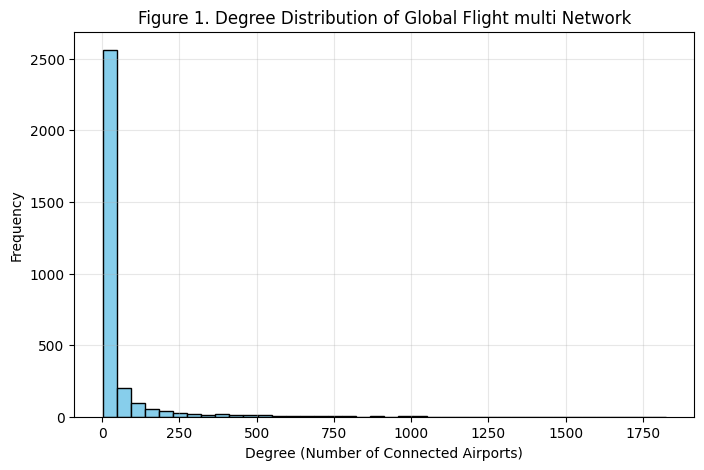

In [29]:
# compute in-degree, out-degree, and total degree
in_deg = dict(flight_multi.in_degree())
out_deg = dict(flight_multi.out_degree())
total_deg = {n: in_deg.get(n, 0) + out_deg.get(n, 0) for n in flight_network.nodes()}

# plot degree distribution
plt.figure(figsize=(8, 5))
plt.hist(total_deg.values(), bins=40, color='skyblue', edgecolor='black')
plt.title("Figure 1. Degree Distribution of Global Flight multi Network")
plt.xlabel("Degree (Number of Connected Airports)")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()


# Undirected Weighted Network

In [30]:
flight_weighted_undir = nx.Graph()

# add undirected edges
for u, v, data in flight_weighted.edges(data=True):
    w = data.get("weight", 1)

    # sum weights if both directions exist
    if flight_weighted_undir.has_edge(u, v):
        flight_weighted_undir[u][v]["weight"] += w
    else:
        flight_weighted_undir.add_edge(u, v, weight=w)

for n, attrs in flight_weighted.nodes(data=True):
    if n in flight_weighted_undir:
        flight_weighted_undir.nodes[n].update(attrs)

print("Nodes:", flight_weighted_undir.number_of_nodes())
print("Edges:", flight_weighted_undir.number_of_edges())

Nodes: 3095
Edges: 18477


# 1. How does network connectivity degrade when we remove the hubs? Which centrality metric best predicts system fragility?

In [31]:
# compute centralities
deg_c = nx.degree_centrality(flight_weighted_undir)
clo_c = nx.closeness_centrality(flight_weighted_undir)
bet_c = nx.betweenness_centrality(flight_weighted_undir, normalized=True)

# sort nodes for each centrality measure
nodes_by_degree = sorted(flight_weighted_undir.nodes(), key=lambda n: deg_c[n], reverse=True)
nodes_by_closeness = sorted(flight_weighted_undir.nodes(), key=lambda n: clo_c[n], reverse=True)
nodes_by_betweenness = sorted(flight_weighted_undir.nodes(), key=lambda n: bet_c[n], reverse=True)

In [32]:
def connectivity_curve(graph, node_order, k=10):
    H = graph.copy()
    N0 = H.number_of_nodes()

    x_removed = []
    y_lcc_frac = []

    for i in range(k):
        node = node_order[i]
        if node in H:
            H.remove_node(node)

        if H.number_of_nodes() > 0:
            lcc_size = max(len(c) for c in nx.connected_components(H))
            y_lcc_frac.append(lcc_size / N0)
        else:
            y_lcc_frac.append(0.0)

        x_removed.append(i + 1)

    return np.array(x_removed), np.array(y_lcc_frac)

In [33]:
x_deg, y_deg = connectivity_curve(flight_weighted_undir, nodes_by_degree)
x_clo, y_clo = connectivity_curve(flight_weighted_undir, nodes_by_closeness)
x_bet, y_bet = connectivity_curve(flight_weighted_undir, nodes_by_betweenness)

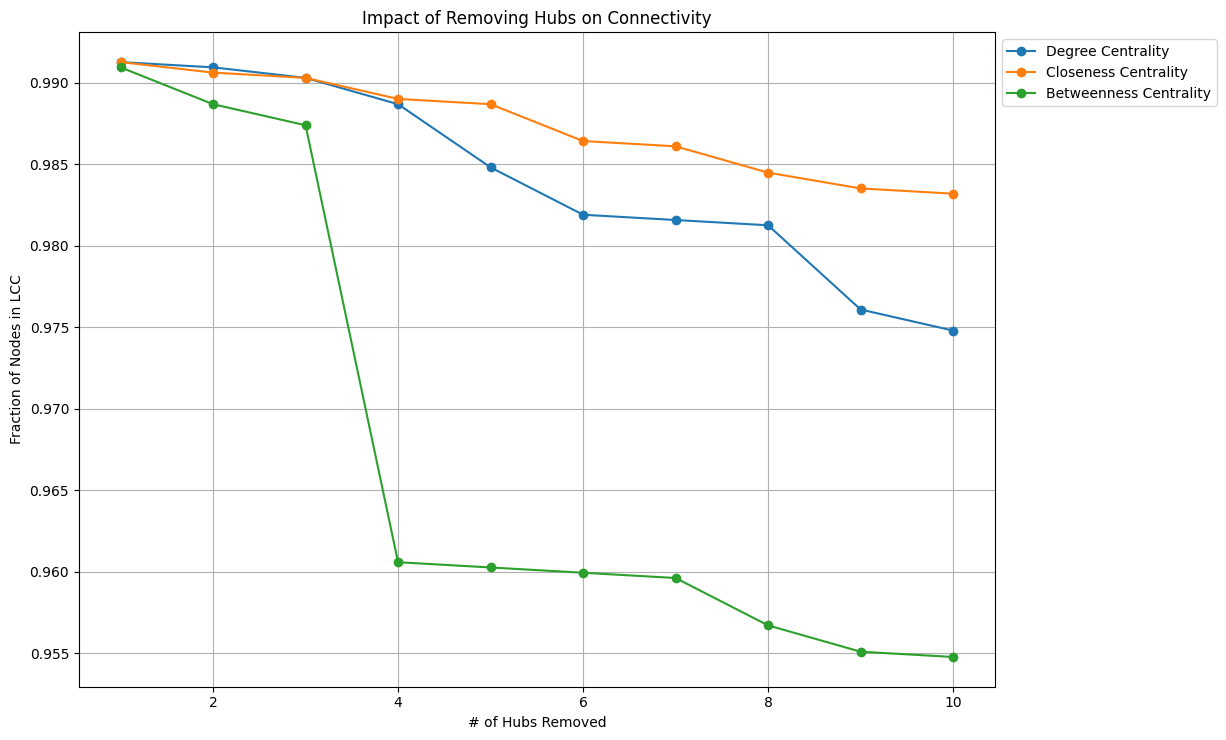

In [34]:
plt.figure(figsize=(12.5,7.5))

plt.plot(x_deg, y_deg, marker="o", label="Degree Centrality")
plt.plot(x_clo, y_clo, marker="o", label="Closeness Centrality")
plt.plot(x_bet, y_bet, marker="o", label="Betweenness Centrality")

plt.xlabel("# of Hubs Removed")
plt.ylabel("Fraction of Nodes in LCC")
plt.title("Impact of Removing Hubs on Connectivity")
plt.legend(bbox_to_anchor=(1.25, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. How did the 9/11 attacks reshape the U.S. airline network, and did United and American change differently from the rest of the industry?

In [35]:
# numeric columns to convert
numeric_cols = [
    "departures_scheduled", "departures_performed",
    "seats", "passengers", "distance",
    "year", "month"
]

# 2001
flights_2001 = pd.read_csv("flights2001.csv")
flights_2001.columns = flights_2001.columns.str.lower()
flights_2001[numeric_cols] = flights_2001[numeric_cols].apply(pd.to_numeric, errors="coerce")
# drop rows missing airport codes
flights_2001 = flights_2001.dropna(subset=["origin", "dest"])
# only keep performed flights
flights_2001 = flights_2001[flights_2001["departures_performed"] > 0]

# 2002
flights_2002 = pd.read_csv("flights2002.csv")
flights_2002.columns = flights_2002.columns.str.lower()
flights_2002[numeric_cols] = flights_2002[numeric_cols].apply(pd.to_numeric, errors="coerce")
flights_2002 = flights_2002.dropna(subset=["origin", "dest"])
flights_2002 = flights_2002[flights_2002["departures_performed"] > 0]

In [36]:
# organize to before and after 9/11
before_911 = flights_2001[flights_2001["month"].isin([4,5,6,7,8])]
after_911 = pd.concat([flights_2001[flights_2001["month"].isin([10,11,12])], flights_2002[flights_2002["month"].isin([1,2])]])

In [37]:
# keep only US airlines
us_passenger_airlines = {
    "United Air Lines Inc.",
    "American Airlines Inc.",
    "Delta Air Lines Inc.",
    "Continental Air Lines Inc.",
    "Northwest Airlines Inc.",
    "US Airways Inc.",
    "America West Airlines Inc.",
    "Trans World Airways LLC",
    "Southwest Airlines Co.",
    "Alaska Airlines Inc.",
    "Hawaiian Airlines Inc.",
    "Frontier Airlines Inc.",
    "ATA Airlines d/b/a ATA",
    "Sun Country Airlines d/b/a MN Airlines",
    "JetBlue Airways",
    "Spirit Air Lines",
    "AirTran Airways Corporation",
    "Vanguard Airlines Inc.",
    "Allegiant Air",
    "Midway Airlines Inc.",
    "National Airlines",
    "Aloha Airlines Inc.",
    "ExpressJet Airlines Inc.",
    "ExpressJet Airlines LLC d/b/a aha!",
    "Trans States Airlines",
    "Comair Inc.",
    "Mesaba Airlines",
    "Executive Airlines",
    "North American Airlines",
    "Chicago Express Airlines",
    "Air Wisconsin Airlines Corp",
    "Envoy Air",
    "Horizon Air",
    "USA 3000 Airlines"
}

before_911_us = before_911[
    before_911["unique_carrier_name"].isin(us_passenger_airlines)
]
after_911_us = after_911[
    after_911["unique_carrier_name"].isin(us_passenger_airlines)
]

In [38]:
# split American and United from the rest
aa_ua_names = {
    "American Airlines Inc.",
    "United Air Lines Inc."
}

aa_ua_before_911 = before_911_us[before_911_us["unique_carrier_name"].isin(aa_ua_names)]
aa_ua_after_911  = after_911_us[after_911_us["unique_carrier_name"].isin(aa_ua_names)]

other_us_before_911 = before_911_us[~before_911_us["unique_carrier_name"].isin(aa_ua_names)]
other_us_after_911  = after_911_us[~after_911_us["unique_carrier_name"].isin(aa_ua_names)]


In [39]:
def create_flight_network(df):
    G = nx.DiGraph()

    for _, row in df.iterrows():
        origin = row['origin']
        dest = row['dest']

        # add edge
        if G.has_edge(origin, dest):
            G[origin][dest]['departures_performed'] += row['departures_performed']
            G[origin][dest]['passengers'] += row['passengers']
            G[origin][dest]['seats'] += row['seats']
        else:
            G.add_edge(origin, dest,
                      departures_performed=row['departures_performed'],
                      passengers=row['passengers'],
                      seats=row['seats'],
                      distance=row['distance'])

    return G

before_911_us_net = create_flight_network(before_911_us)
after_911_us_net = create_flight_network(after_911_us)

aa_ua_before_911_net = create_flight_network(aa_ua_before_911)
aa_ua_after_911_net = create_flight_network(aa_ua_after_911)

other_us_before_911_net = create_flight_network(other_us_before_911)
other_us_after_911_net = create_flight_network(other_us_after_911)

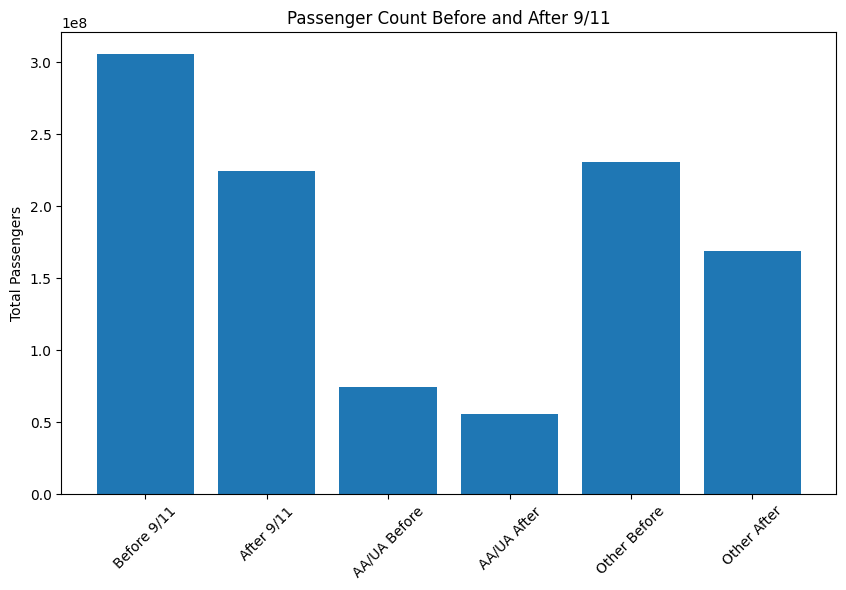

In [40]:
def total_passengers(df):
    return df["passengers"].sum()

values = {
    "Before 9/11": total_passengers(before_911_us),
    "After 9/11": total_passengers(after_911_us),
    "AA/UA Before": total_passengers(aa_ua_before_911),
    "AA/UA After": total_passengers(aa_ua_after_911),
    "Other Before": total_passengers(other_us_before_911),
    "Other After": total_passengers(other_us_after_911),
}

plt.figure(figsize=(10,6))
plt.bar(values.keys(), values.values())
plt.xticks(rotation=45)
plt.ylabel("Total Passengers")
plt.title("Passenger Count Before and After 9/11")
plt.show()

In [41]:
print('Passenger counts before and after 9/11 (all US airlines):')
print(f"Before 9/11: {values['Before 9/11']:,} passengers")
print(f"After 9/11:  {values['After 9/11']:,} passengers")
print(f"Drop in passenger traffic (all US airlines): {((values['After 9/11'] - values['Before 9/11']) / values['Before 9/11']) * 100:.2f}%")

print('\nPassenger counts before and after 9/11 (American Airlines/United Air Lines):')
print(f"AA/UA Before 9/11: {values['AA/UA Before']:,} passengers")
print(f"AA/UA After 9/11:  {values['AA/UA After']:,} passengers")
print(f"Drop in passenger traffic (AA/UA): {((values['AA/UA After'] - values['AA/UA Before']) / values['AA/UA Before']) * 100:.2f}%")

print('\nPassenger counts before and after 9/11 (Other US airlines):')
print(f"Other US Before 9/11: {values['Other Before']:,} passengers")
print(f"Other US After 9/11:  {values['Other After']:,} passengers")
print(f"Drop in passenger traffic (Other US airlines): {((values['Other After'] - values['Other Before']) / values['Other Before']) * 100:.2f}%")

Passenger counts before and after 9/11 (all US airlines):
Before 9/11: 305,340,596.0 passengers
After 9/11:  224,200,627.0 passengers
Drop in passenger traffic (all US airlines): -26.57%

Passenger counts before and after 9/11 (American Airlines/United Air Lines):
AA/UA Before 9/11: 74,705,093.0 passengers
AA/UA After 9/11:  55,613,386.0 passengers
Drop in passenger traffic (AA/UA): -25.56%

Passenger counts before and after 9/11 (Other US airlines):
Other US Before 9/11: 230,635,503.0 passengers
Other US After 9/11:  168,587,241.0 passengers
Drop in passenger traffic (Other US airlines): -26.90%


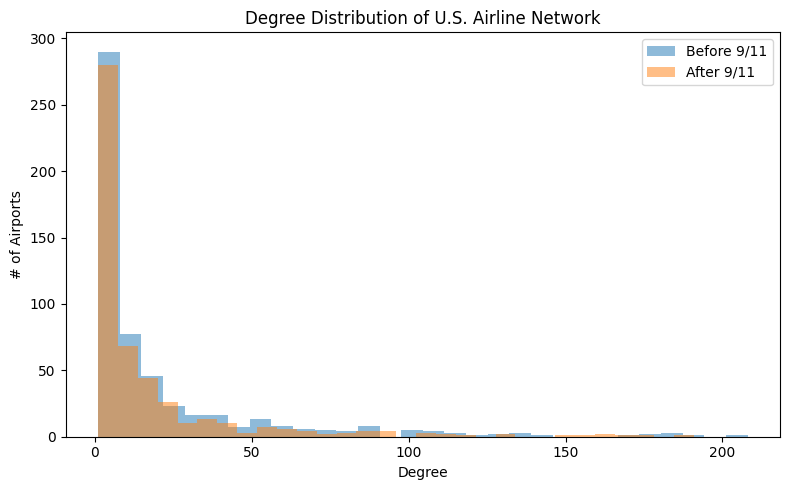

In [42]:
def plot_degree_distribution(G_before, G_after, labels=("Before 9/11", "After 9/11"), title="Degree Distribution of U.S. Airline Network"):
    G_before_und = G_before.to_undirected()
    G_after_und  = G_after.to_undirected()

    deg_before = [d for _, d in G_before_und.degree()]
    deg_after  = [d for _, d in G_after_und.degree()]

    plt.figure(figsize=(8, 5))
    plt.hist(deg_before, bins=30, alpha=0.5, label=labels[0])
    plt.hist(deg_after,  bins=30, alpha=0.5, label=labels[1])
    plt.xlabel("Degree")
    plt.ylabel("# of Airports")
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_degree_distribution(before_911_us_net, after_911_us_net)

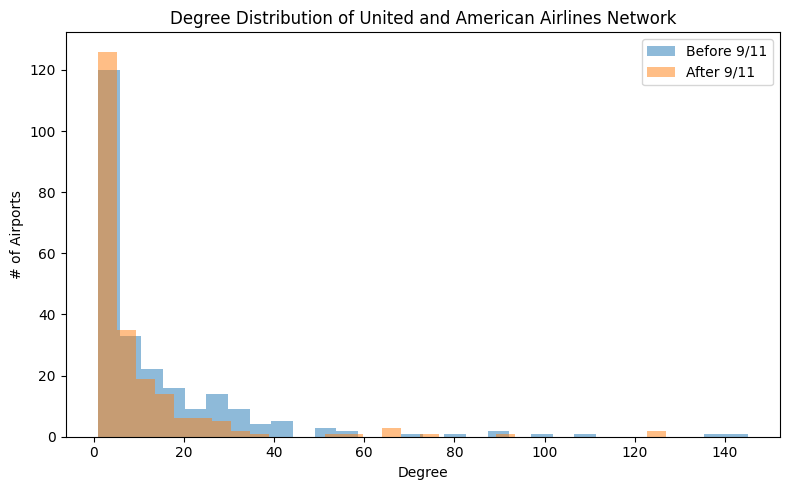

In [43]:
plot_degree_distribution(aa_ua_before_911_net, aa_ua_after_911_net, title="Degree Distribution of United and American Airlines Network")

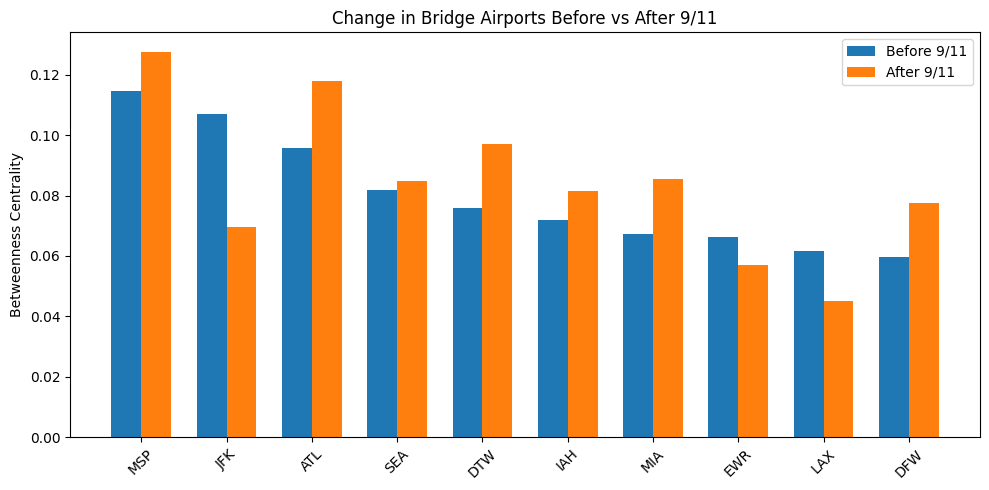

In [44]:
before_undir = before_911_us_net.to_undirected()
after_undir  = after_911_us_net.to_undirected()

bet_before = nx.betweenness_centrality(before_undir, normalized=True)
bet_after  = nx.betweenness_centrality(after_undir,  normalized=True)

top_airports = sorted(bet_before, key=bet_before.get, reverse=True)[:10]

before_vals = [bet_before[a] for a in top_airports]
after_vals  = [bet_after.get(a, 0.0) for a in top_airports]

x = np.arange(len(top_airports))
width = 0.35

plt.figure(figsize=(10,5))
plt.bar(x - width/2, before_vals, width, label="Before 9/11")
plt.bar(x + width/2, after_vals,  width, label="After 9/11")

plt.xticks(x, top_airports, rotation=45)
plt.ylabel("Betweenness Centrality")
plt.title("Change in Bridge Airports Before vs After 9/11")
plt.legend()
plt.tight_layout()
plt.show()

# Temporal Flight Data (2019, 2020, 2023)



In [46]:
# 2019 (pre-pandemic)
flights_2019 = pd.read_csv("flights2019.csv")
flights_2019.columns = flights_2019.columns.str.lower()
flights_2019[numeric_cols] = flights_2019[numeric_cols].apply(pd.to_numeric, errors="coerce")
# drop rows missing airport codes
flights_2019 = flights_2019.dropna(subset=["origin", "dest"])
# only keep performed flights
flights_2019 = flights_2019[flights_2019["departures_performed"] > 0]

# 2020 (pandemic)
flights_2020 = pd.read_csv("flights2020.csv")
flights_2020.columns = flights_2020.columns.str.lower()
flights_2020[numeric_cols] = flights_2020[numeric_cols].apply(pd.to_numeric, errors="coerce")
flights_2020 = flights_2020.dropna(subset=["origin", "dest"])
flights_2020 = flights_2020[flights_2020["departures_performed"] > 0]

# 2023 (recovery)
flights_2023 = pd.read_csv("flights2023.csv")
flights_2023.columns = flights_2023.columns.str.lower()
flights_2023[numeric_cols] = flights_2023[numeric_cols].apply(pd.to_numeric, errors="coerce")
flights_2023 = flights_2023.dropna(subset=["origin", "dest"])
flights_2023 = flights_2023[flights_2023["departures_performed"] > 0]

# 3. How did the global airline network actually change during COVID?

In [47]:
# Create networks for each period
pre_covid_net = create_flight_network(flights_2019)
during_covid_net = create_flight_network(flights_2020)
recovery_net = create_flight_network(flights_2023)

print(f"Pre-COVID (2019): {pre_covid_net.number_of_nodes()} airports, {pre_covid_net.number_of_edges()} routes")
print(f"During COVID (2020): {during_covid_net.number_of_nodes()} airports, {during_covid_net.number_of_edges()} routes")
print(f"Recovery (2023): {recovery_net.number_of_nodes()} airports, {recovery_net.number_of_edges()} routes")

Pre-COVID (2019): 1990 airports, 35943 routes
During COVID (2020): 1873 airports, 30299 routes
Recovery (2023): 2079 airports, 40804 routes


In [48]:
# how much traffic was lost?
passengers_2019 = flights_2019["passengers"].sum()
passengers_2020 = flights_2020["passengers"].sum()
passengers_2023 = flights_2023["passengers"].sum()

flights_2019_count = flights_2019["departures_performed"].sum()
flights_2020_count = flights_2020["departures_performed"].sum()
flights_2023_count = flights_2023["departures_performed"].sum()

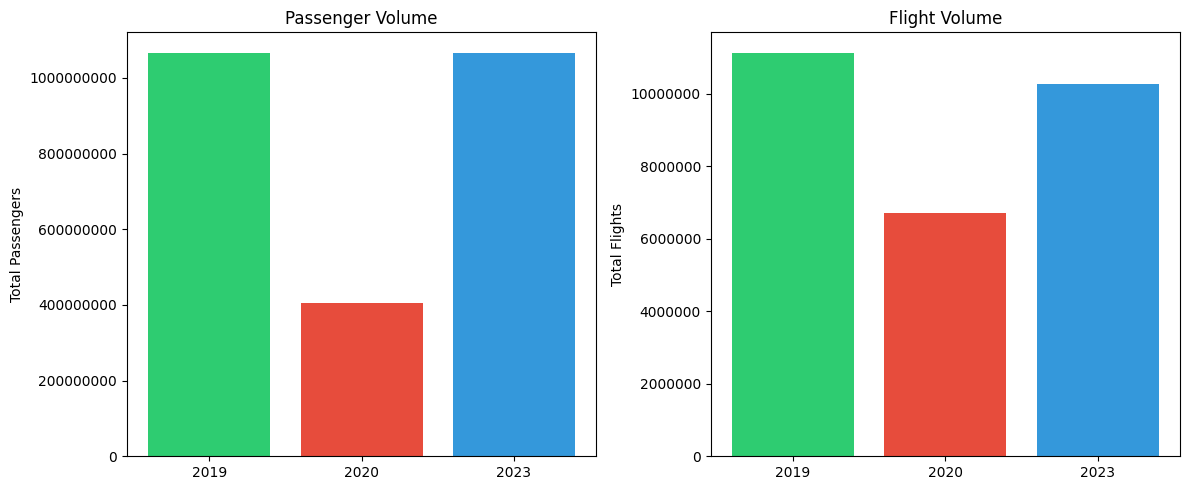


Passenger drop in 2020: -61.9%
Flight drop in 2020: -39.7%
2023 recovery: 100.1% of 2019 passenger levels


In [49]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

years = ['2019', '2020', '2023']
passenger_counts = [passengers_2019, passengers_2020, passengers_2023]
flight_counts = [flights_2019_count, flights_2020_count, flights_2023_count]
colors = ['#2ecc71', '#e74c3c', '#3498db']

axes[0].bar(years, passenger_counts, color=colors)
axes[0].set_ylabel('Total Passengers')
axes[0].set_title('Passenger Volume')
axes[0].ticklabel_format(style='plain', axis='y')

axes[1].bar(years, flight_counts, color=colors)
axes[1].set_ylabel('Total Flights')
axes[1].set_title('Flight Volume')
axes[1].ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

print(f"\nPassenger drop in 2020: {(passengers_2020/passengers_2019 - 1)*100:.1f}%")
print(f"Flight drop in 2020: {(flights_2020_count/flights_2019_count - 1)*100:.1f}%")
print(f"2023 recovery: {(passengers_2023/passengers_2019)*100:.1f}% of 2019 passenger levels")

In [50]:
# Network structure changes
G_2019_und = pre_covid_net.to_undirected()
G_2020_und = during_covid_net.to_undirected()
G_2023_und = recovery_net.to_undirected()

avg_degree_2019 = sum(dict(G_2019_und.degree()).values()) / G_2019_und.number_of_nodes()
avg_degree_2020 = sum(dict(G_2020_und.degree()).values()) / G_2020_und.number_of_nodes()
avg_degree_2023 = sum(dict(G_2023_und.degree()).values()) / G_2023_und.number_of_nodes()

density_2019 = nx.density(pre_covid_net)
density_2020 = nx.density(during_covid_net)
density_2023 = nx.density(recovery_net)

print(f"\nNetwork connectivity:")
print(f"Average degree 2019: {avg_degree_2019:.1f}, 2020: {avg_degree_2020:.1f}, 2023: {avg_degree_2023:.1f}")
print(f"Network density 2019: {density_2019:.4f}, 2020: {density_2020:.4f}, 2023: {density_2023:.4f}")


Network connectivity:
Average degree 2019: 23.5, 2020: 20.7, 2023: 25.6
Network density 2019: 0.0091, 2020: 0.0086, 2023: 0.0094


In [51]:
# Degree distribution
deg_2019 = [d for _, d in G_2019_und.degree()]
deg_2020 = [d for _, d in G_2020_und.degree()]
deg_2023 = [d for _, d in G_2023_und.degree()]

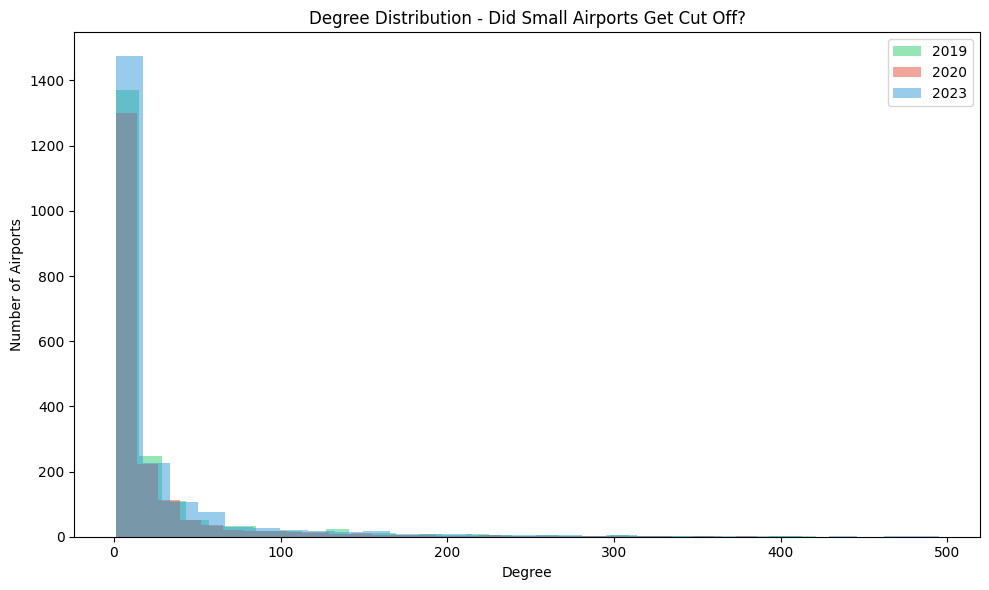

In [52]:
plt.figure(figsize=(10, 6))
plt.hist(deg_2019, bins=30, alpha=0.5, label='2019', color='#2ecc71')
plt.hist(deg_2020, bins=30, alpha=0.5, label='2020', color='#e74c3c')
plt.hist(deg_2023, bins=30, alpha=0.5, label='2023', color='#3498db')
plt.xlabel('Degree')
plt.ylabel('Number of Airports')
plt.title('Degree Distribution - Did Small Airports Get Cut Off?')
plt.legend()
plt.tight_layout()
plt.show()

## Which routes survived?

In [53]:
routes_2019 = set(pre_covid_net.edges())
routes_2020 = set(during_covid_net.edges())
routes_2023 = set(recovery_net.edges())

routes_lost = routes_2019 - routes_2020
routes_survived = routes_2019 & routes_2020
routes_recovered = routes_lost & routes_2023
routes_new = routes_2023 - routes_2019

print(f"\nRoutes survival:")
print(f"Total routes in 2019: {len(routes_2019)}")
print(f"Routes lost in 2020: {len(routes_lost)} ({len(routes_lost)/len(routes_2019)*100:.1f}%)")
print(f"Routes that survived: {len(routes_survived)} ({len(routes_survived)/len(routes_2019)*100:.1f}%)")
print(f"Routes recovered by 2023: {len(routes_recovered)} ({len(routes_recovered)/len(routes_lost)*100:.1f}% of lost routes)")
print(f"Brand new routes in 2023: {len(routes_new - routes_recovered)}")


Routes survival:
Total routes in 2019: 35943
Routes lost in 2020: 15481 (43.1%)
Routes that survived: 20462 (56.9%)
Routes recovered by 2023: 4668 (30.2% of lost routes)
Brand new routes in 2023: 18865


In [54]:
labels = ['2019\nTotal', 'Survived\n2020', 'Lost\n2020', 'Recovered\n2023', 'New\n2023']
values = [len(routes_2019), len(routes_survived), len(routes_lost),
          len(routes_recovered), len(routes_new - routes_recovered)]

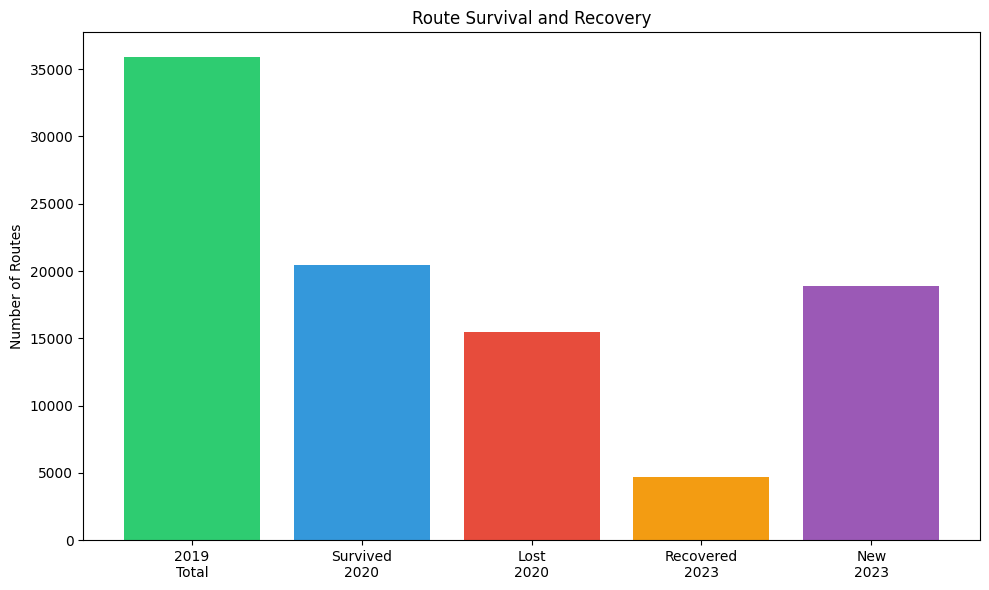

In [55]:
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['#2ecc71', '#3498db', '#e74c3c', '#f39c12', '#9b59b6'])
plt.ylabel('Number of Routes')
plt.title('Route Survival and Recovery')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

## Which hubs got hit the hardest?

In [56]:
def get_top_hubs(G, n=20):
    degrees = dict(G.to_undirected().degree())
    return sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:n]

hubs_2019 = get_top_hubs(pre_covid_net, 20)
hub_airports = [h[0] for h in hubs_2019]

# Calculate degree changes for top hubs
hub_changes = []
for airport in hub_airports:
    deg_2019 = dict(G_2019_und.degree()).get(airport, 0)
    deg_2020 = dict(G_2020_und.degree()).get(airport, 0)
    deg_2023 = dict(G_2023_und.degree()).get(airport, 0)

    if deg_2019 > 0:
        pct_change_2020 = (deg_2020 - deg_2019) / deg_2019 * 100
        pct_change_2023 = (deg_2023 - deg_2019) / deg_2019 * 100
        hub_changes.append((airport, pct_change_2020, pct_change_2023))

# Sort by biggest losses
hub_changes.sort(key=lambda x: x[1])

print("\nTop 10 most affected hubs (by connectivity loss):")
for airport, change_2020, change_2023 in hub_changes[:10]:
    print(f"{airport}: {change_2020:.1f}% in 2020, {change_2023:.1f}% by 2023")


Top 10 most affected hubs (by connectivity loss):
TEB: -40.2% in 2020, 17.9% by 2023
LAS: -24.0% in 2020, 24.4% by 2023
HPN: -22.0% in 2020, 32.7% by 2023
BOS: -22.0% in 2020, 10.1% by 2023
BNA: -21.6% in 2020, 11.0% by 2023
SFO: -21.1% in 2020, 6.4% by 2023
PHL: -18.2% in 2020, 6.8% by 2023
EWR: -15.7% in 2020, 7.9% by 2023
DFW: -11.0% in 2020, -6.2% by 2023
LAX: -9.4% in 2020, 12.4% by 2023


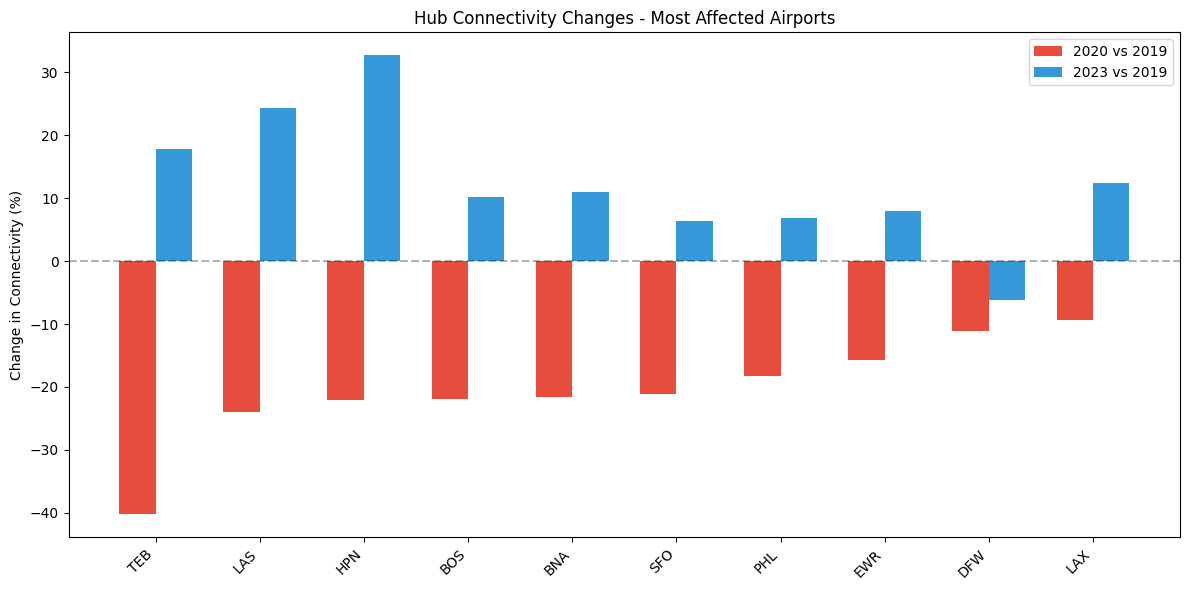

In [57]:
# Plot hub changes
airports = [x[0] for x in hub_changes[:10]]
changes_2020 = [x[1] for x in hub_changes[:10]]
changes_2023 = [x[2] for x in hub_changes[:10]]

x = np.arange(len(airports))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, changes_2020, width, label='2020 vs 2019', color='#e74c3c')
plt.bar(x + width/2, changes_2023, width, label='2023 vs 2019', color='#3498db')
plt.ylabel('Change in Connectivity (%)')
plt.title('Hub Connectivity Changes - Most Affected Airports')
plt.xticks(x, airports, rotation=45, ha='right')
plt.legend()
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()